# Diferencia entre "Likelihood" y "Probability"

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy.integrate
from scipy.stats import norm
from scipy.integrate import trapz

In [19]:
df = pd.read_csv('SOCR-HeightWeight.csv')
height = df["Height(Inches)"].to_numpy()
weight = df["Weight(Pounds)"].to_numpy()

mean_height, std_height = norm.fit(height)
mean_weight, std_weight = norm.fit(weight)

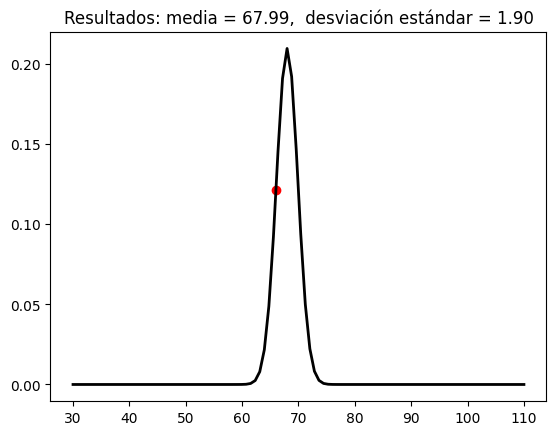

In [42]:
x = np.linspace(30, 110, 100)
p_height = norm.pdf(x, mean_height, std_height)
plt.plot(x, p_height, 'k', linewidth=2)
title = "Resultados: media = %.2f,  desviación estándar = %.2f" % (mean_height, std_height)
plt.title(title)
plt.scatter(66, norm.pdf(66, mean_height, std_height), c='r') # Likelihood
plt.show()

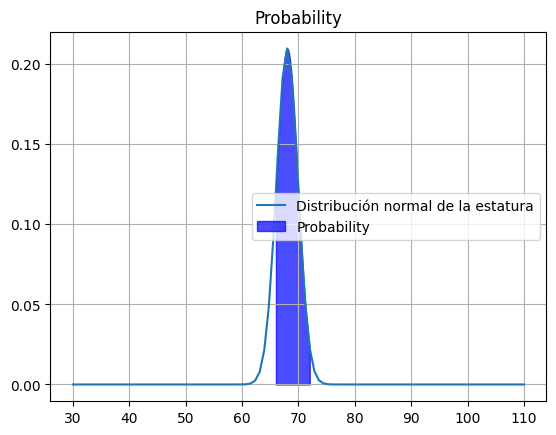

In [62]:
intervalo = np.linspace(66, 72, 100)
f_x = norm.pdf(intervalo, mean_height, std_height)
area = trapz(f_x, intervalo)
plt.plot(x, p_height, label='Distribución normal de la estatura')
plt.fill_between(intervalo, 0, f_x, where=(intervalo >=66) & (intervalo <=72), color='blue', alpha=0.7, label='Probability')

plt.title('Probability')
plt.grid(True)
plt.legend()
plt.show()

Lo siguiente simboliza la **likelihood de dado que una persona pesa 120 libras entonces cual es la probabilidad de que la media sea $$127.08$$ y la desviación estándar sea $$11.66$$**
En notación, lo anterior es:
$$
    L \left( \mu = 127.08 \land \sigma = 11.66 \ | \ Weight = 120 \right) = 0.028
$$ 

Likelihood: 0.028454272203218035


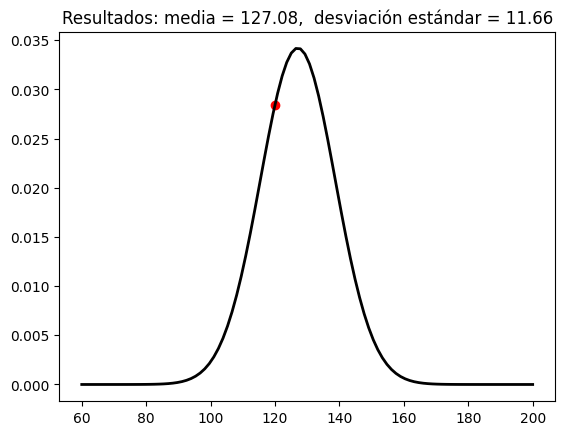

In [87]:
x = np.linspace(60, 200, 100)
p_weight = norm.pdf(x, mean_weight, std_weight)
plt.plot(x, p_weight, 'k', linewidth=2)
title = "Resultados: media = %.2f,  desviación estándar = %.2f" % (mean_weight, std_weight)
plt.title(title)
plt.scatter(120, norm.pdf(120, mean_weight, std_weight), c='r') # Likelihood
print("Likelihood: " + str(norm.pdf(120, mean_weight, std_weight)))
plt.show()

Lo siguiente es: La **probabilidad de que el peso de una persona sea entre 122 libras y 145 libras**
Matemáticamente se denota de la siguiente manera:
$$
    P\left(Weight \geq 122  \land Weight \leq 145  \ | \ \mu = 127.08 \land \sigma = 11.66 \right)
$$
Por construcción la anterior probabilidad se calcula de la siguiente manera:
$$
    \int_{122}^{145} \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx
$$
con:
$$
\mu = 127.08
$$
y 
$$
\sigma = 11.66
$$

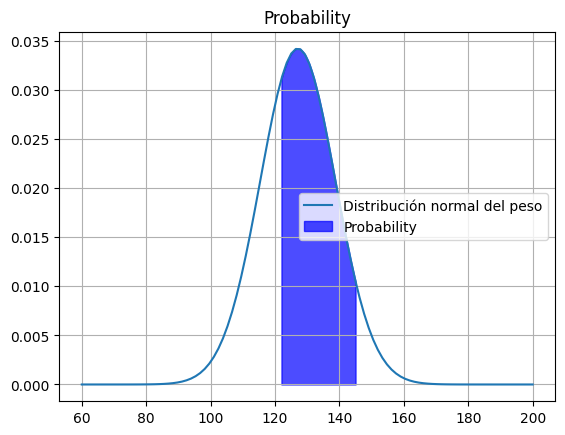

In [68]:
intervalo = np.linspace(122, 145, 100)
f_x = norm.pdf(intervalo, mean_weight, std_weight)
area = trapz(f_x, intervalo)
plt.plot(x, p_weight, label='Distribución normal del peso')
plt.fill_between(intervalo, 0, f_x, where=(intervalo >= 122) & (intervalo <= 145), color='blue', alpha=0.7, label='Probability')
plt.title('Probability')
plt.grid(True)
plt.legend()
plt.show()

# Naive Bayes Gaussiano

In [94]:
yes_array_1 = np.array([20.69, 13.34, 19.32, 32.77, 27.2, 30.64, 23.34, 22.02, 25.47, 15.32,
                        30.17, 29.86, 44.57, 22.54, 26.55, 23.86, 36.93, 22.04, 20.57, 16.09,
                        18.91, 21.05, 27.55, 29.35, 28.34, 32.41, 27.73, 30.07, 33.7, 17.37,
                        32.71, 22.01, 27.33, 29.94, 21.55, 20.64, 22.98, 30.22, 26.67, 26.43,
                        20.91, 24.13, 28.55, 28.09, 24.36, 13.51, 18.36, 22.24, 25.26, 39.17])
no_array_1 = np.array([90.45, 77.65, 97.57, 84.09, 72.69, 85.47, 97.79, 67.06, 80.36, 85.96,
                       82.99, 81.13, 78.08, 77.05, 71.27, 62.18, 78.76, 71.14, 86.71, 91.09,
                       82.38, 99.47, 75.37, 73.09, 73.68, 90, 91.33, 77.54, 86.59, 83.66, 94.28,
                       75.25, 69.5, 80.6, 64.53, 65.59, 84.15, 73.82, 72.47, 76.16, 93.39, 89.9,
                       73.63, 78.82, 76.1, 89.62, 92.81, 76.68, 72.65, 102.77])
yes_array_2 = np.array([37.35, 39.81, -13.98, -38.24, 30.02, -38.21, 22.79, -46.29, 34.29,
                        -93.68, 49.22, -38.87, 49.21, 48.95, 39.14, 6.78, -21.43, 109.92, 123,
                        62.61, 117.13, -55.26, 87.03, 85.79, 70.63, 162.83, 116.73, 63.86,
                        -26.54, -85.2, 22.84, 45.4, 49.87, 4.21, 14.95, 128.65, 25.02, -96.25,
                        65.79, -12.5, 71.4, 42.37, -31.83, 93.56, 39.09, -12.77, -14.66, 75.65, 72.6, 82.57])
no_array_2 = np.array([69.07, 59.94, 54.83, 68.28, 75.14, 52.77, 68.26, 74.92, 75.38, 76.6,
                       47.93, 49.06, 49.49, 71.44, 72.6, 82.57, 47.77, 67.02, 38.89, 93.17,
                       70.72, 64.97, 55.57, 80.17, 66.24, 76.7, 93.86, 59.23, 70.2, 89.48,
                       90, 56.27, 68.04, 87.17, 88.64, 84.94, 66.87, 68.56, 54.32, 62.28,
                       91.59, 65.89, 58.44, 42.62, 53.71, 73.04, 79.44, 59.89, 60.78, 70.75])
yes_array_3 = np.array([39.77, 47.92, 44.95, 40.73, 49.74, 40.72, 46.09, 27.93, 37.44, 52.57,
                        61.82, 43.53, 56.13, 40, 42.29, 39.1, 47.68, 49.47, 50.32, 38.81,
                        33.76, 35.94, 35.4, 45.87, 48.34, 62.16, 52.02, 52.53, 37.16, 58.44,
                        48.07, 54.53, 62.41, 50.59, 53, 36.18, 52.95, 46.64, 47.28, 41.66,
                        50.1, 36.05, 58.12, 39.56, 42.12, 44.91, 35.69, 49.61, 53.12, 48.48])
no_array_3 = np.array([34.24, 32.14, 32.99, 32.39, 31.7, 24.54, 27.85, 27.38, 33.11, 30.2,
                       30.5, 35.31, 34.13, 39.57, 34.25, 36.08, 42.42, 25.29, 27.85, 33.02,
                       36.26, 33.41, 35.87, 34.31, 31.72, 34.78, 33.25, 24.85, 27.89, 25.66,
                       28.03, 33.44, 43.93, 32.11, 20.71, 38.07, 34.18, 36.6, 34.74, 27.6,
                       35.23, 35.31, 34.08, 22.7, 39.91, 26.94, 30.18, 24.91, 35.94, 40.66])

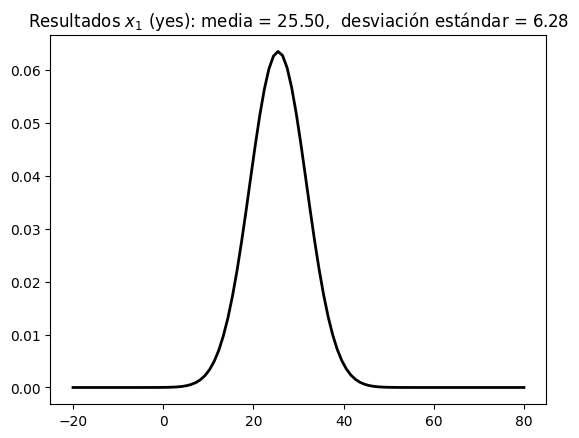

In [123]:
x = np.linspace(-20, 80, 100)
p_height = norm.pdf(x, np.mean(yes_array_1), np.std(yes_array_1))
plt.plot(x, p_height, 'k', linewidth=2)
title = "Resultados $x_1$ (yes): media = %.2f,  desviación estándar = %.2f" % (np.mean(yes_array_1), np.std(yes_array_1))
plt.title(title)
plt.show()

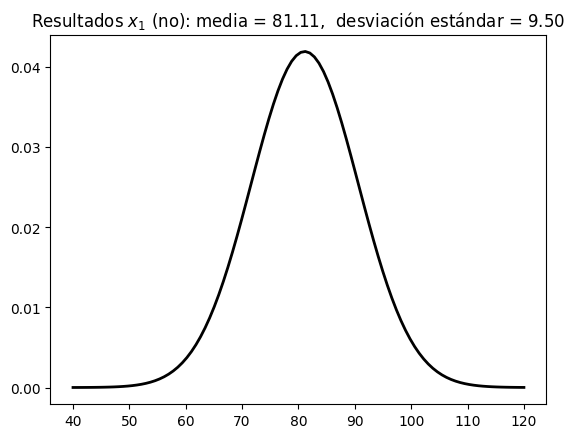

In [122]:
x = np.linspace(40, 120, 100)
p_height = norm.pdf(x, np.mean(no_array_1), np.std(no_array_1))
plt.plot(x, p_height, 'k', linewidth=2)
title = "Resultados $x_1$ (no): media = %.2f,  desviación estándar = %.2f" % (np.mean(no_array_1), np.std(no_array_1))
plt.title(title)
plt.show()

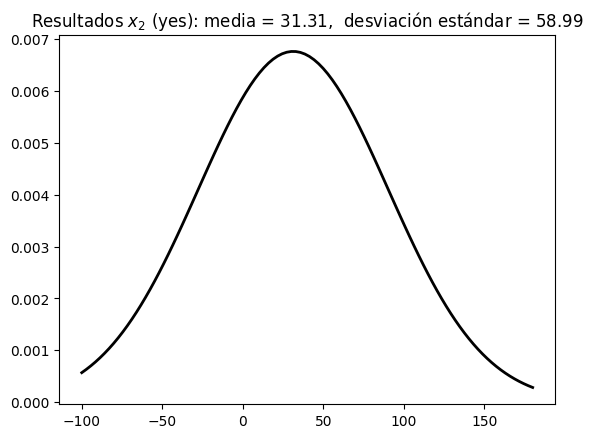

In [121]:
x = np.linspace(-100, 180, 100)
p_height = norm.pdf(x, np.mean(yes_array_2), np.std(yes_array_2))
plt.plot(x, p_height, 'k', linewidth=2)
title = "Resultados $x_2$ (yes): media = %.2f,  desviación estándar = %.2f" % (np.mean(yes_array_2), np.std(yes_array_2))
plt.title(title)
plt.show()

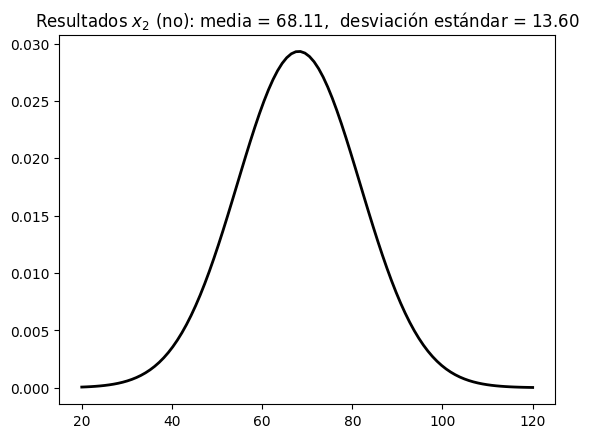

In [120]:
x = np.linspace(20, 120, 100)
p_height = norm.pdf(x, np.mean(no_array_2), np.std(no_array_2))
plt.plot(x, p_height, 'k', linewidth=2)
title = "Resultados $x_2$ (no): media = %.2f,  desviación estándar = %.2f" % (np.mean(no_array_2), np.std(no_array_2))
plt.title(title)
plt.show()

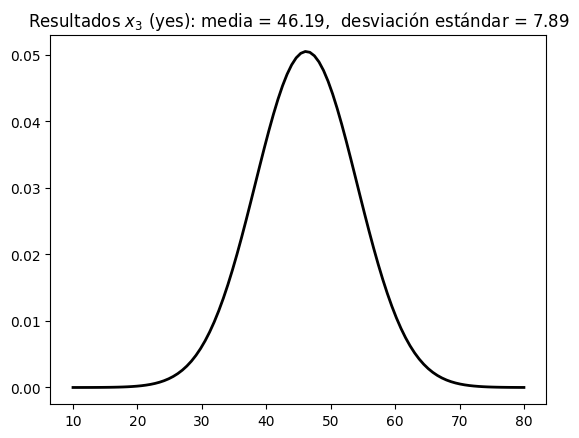

In [119]:
x = np.linspace(10, 80, 100)
p_height = norm.pdf(x, np.mean(yes_array_3), np.std(yes_array_3))
plt.plot(x, p_height, 'k', linewidth=2)
title = "Resultados $x_3$ (yes): media = %.2f,  desviación estándar = %.2f" % (np.mean(yes_array_3), np.std(yes_array_3))
plt.title(title)
plt.show()

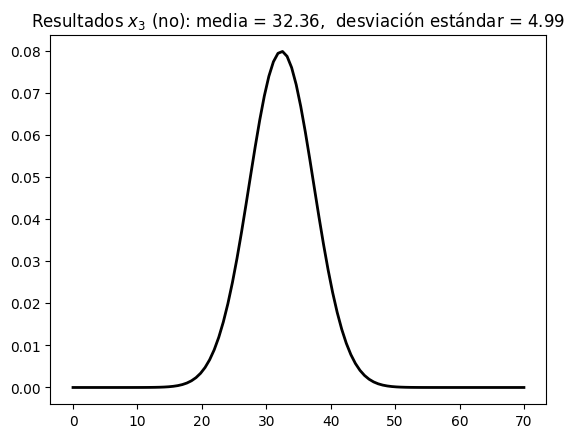

In [126]:
x = np.linspace(0, 70, 100)
p_height = norm.pdf(x, np.mean(no_array_3), np.std(no_array_3))
plt.plot(x, p_height, 'k', linewidth=2)
title = "Resultados $x_3$ (no): media = %.2f,  desviación estándar = %.2f" % (np.mean(no_array_3), np.std(no_array_3))
plt.title(title)
plt.show()

# Clasificación de nuevos

In [147]:

to_classify = [[78, 46, 47], [48, 60, 67], [31, 69, 57], [35, 46, 39], [81, 40, 92], [100, 134, 43], [97, 72, 26], [59, 33, 145], [100, 71, 104], [105, 44, 90], [130, 124, 34], [84, 36, 32], [106, 143, 112], [143, 19, 91]]

In [148]:
mu_yes = [np.mean(yes_array_1), np.mean(yes_array_2), np.mean(yes_array_3)]
mu_no = [np.mean(no_array_1), np.mean(no_array_2), np.mean(no_array_3)]
sigma_yes = [np.std(yes_array_1), np.std(yes_array_2), np.std(yes_array_3)]
sigma_no = [np.std(no_array_1), np.std(no_array_2), np.std(no_array_3)]
likelihoods = []
total = yes_array_1.shape[0] + yes_array_2.shape[0] + yes_array_3.shape[0] + no_array_1.shape[0] + no_array_2.shape[0] + no_array_3.shape[0]
p_yes = (yes_array_1.shape[0] + yes_array_2.shape[0] + yes_array_3.shape[0]) / total
p_no = (no_array_1.shape[0] + no_array_2.shape[0] + no_array_3.shape[0]) / total
for observation in to_classify:
    x1_yes = norm.pdf(observation[0], mu_yes[0], sigma_yes[0])
    x2_yes = norm.pdf(observation[1], mu_yes[1], sigma_yes[1])
    x3_yes = norm.pdf(observation[2], mu_yes[2], sigma_yes[2])
    x1_no = norm.pdf(observation[0], mu_no[0], sigma_no[0])
    x2_no = norm.pdf(observation[1], mu_no[1], sigma_no[1])
    x3_no = norm.pdf(observation[2], mu_no[2], sigma_no[2])
    likelihoods.append((np.log(p_yes * x1_yes * x2_yes * x3_yes), np.log(p_no * x1_no * x2_no * x3_no)))

for i in range(len(to_classify)):
    s = "La observación: " + str(to_classify[i])
    likelihood = likelihoods[i]
    if (likelihood[0] > likelihood[1]):
        s += " pertenece a la clase yes."
    else:
        s += " pertenece a la clase no."
    print(s)

La observación: [78, 46, 47] pertenece a la clase no.
La observación: [48, 60, 67] pertenece a la clase yes.
La observación: [31, 69, 57] pertenece a la clase yes.
La observación: [35, 46, 39] pertenece a la clase yes.
La observación: [81, 40, 92] pertenece a la clase yes.
La observación: [100, 134, 43] pertenece a la clase no.
La observación: [97, 72, 26] pertenece a la clase no.
La observación: [59, 33, 145] pertenece a la clase yes.
La observación: [100, 71, 104] pertenece a la clase yes.
La observación: [105, 44, 90] pertenece a la clase no.
La observación: [130, 124, 34] pertenece a la clase no.
La observación: [84, 36, 32] pertenece a la clase no.
La observación: [106, 143, 112] pertenece a la clase yes.
La observación: [143, 19, 91] pertenece a la clase no.


Así tenemos que la ecuación para determinar a que clase pertenece una observación es:
$$
    \underset{c \in C}{\mathrm{argmax}} P(c)\prod_{i = 1}^{n}L(X_{i} = O_{i} | c)
$$
donde:
* $X_{i}$ es la característica $i$-esíma.
* $O_{i}$ es el valor puntual que tiene la observación.
* $c$ es la clase en la que lo estamos calculando.